<a href="https://colab.research.google.com/github/alexismuela95/formativa6/blob/main/Copia_de_KNNalexismuelav0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/akshayrb22/playing-with-data/blob/master/supervised_learning/KNN/KNN.ipynb)

# K-Nearest Neighbors

   The K-nearest neighbors (KNN) algorithm is a type of supervised machine learning algorithms. KNN is extremely easy to implement in its most basic form, and yet performs quite complex classification tasks. It is a lazy learning algorithm since it doesn't have a specialized training phase. Rather, it uses all of the data for training while classifying a new data point or instance. KNN is a non-parametric learning algorithm, which means that it doesn't assume anything about the underlying data. This is an extremely useful feature since most of the real world data doesn't really follow any theoretical assumption e.g. linear-separability, uniform distribution, etc.
   
## Pros

- It is extremely easy to implement.
- As said earlier, it is lazy learning algorithm and therefore requires no training prior to making real time predictions. This makes the KNN algorithm much faster than other algorithms that require training e.g SVM, linear regression, etc.
- Since the algorithm requires no training before making predictions, new data can be added seamlessly.
- There are only two parameters required to implement KNN i.e. the value of K and the distance function (e.g. Euclidean or Manhattan etc.)

## Cons

- The KNN algorithm doesn't work well with high dimensional data because with large number of dimensions, it becomes difficult for the algorithm to calculate distance in each dimension.
- The KNN algorithm has a high prediction cost for large datasets. This is because in large datasets the cost of calculating distance between new point and each existing point becomes higher.
- Finally, the KNN algorithm doesn't work well with categorical features since it is difficult to find the distance between dimensions with categorical features.

In [3]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import math
import operator

# Importing the Dataset

In [4]:
url = 'https://raw.githubusercontent.com/melwinlobo18/K-Nearest-Neighbors/master/Dataset/data.csv'
df = pd.read_csv(url)  # Dataset - Breast Cancer Wisconsin Data
df['diagnosis'] = df['diagnosis'].map({
    'M': 1,
    'B': 2
})  # Label values - 1 for Malignant and 2 for Benign
labels = df['diagnosis'].tolist()
df['Class'] = labels  #Cpying values of diagnosis to newly clreated labels column
df = df.drop(['id', 'Unnamed: 32', 'diagnosis'],
             axis=1)  #Dropping unncessary columns
df.head()  #Displaying first five rows of the dataset

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [5]:
print(labels)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 2, 2, 1, 1, 2, 1, 1, 1, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 1, 2, 2, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 

In [6]:
print(df)

     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     compactness_mean  concavity_mean  concave points_mean  sym

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   radius_mean              569 non-null    float64
 1   texture_mean             569 non-null    float64
 2   perimeter_mean           569 non-null    float64
 3   area_mean                569 non-null    float64
 4   smoothness_mean          569 non-null    float64
 5   compactness_mean         569 non-null    float64
 6   concavity_mean           569 non-null    float64
 7   concave points_mean      569 non-null    float64
 8   symmetry_mean            569 non-null    float64
 9   fractal_dimension_mean   569 non-null    float64
 10  radius_se                569 non-null    float64
 11  texture_se               569 non-null    float64
 12  perimeter_se             569 non-null    float64
 13  area_se                  569 non-null    float64
 14  smoothness_se            5

In [8]:
df.describe()


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Class
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,1.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,1.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,1.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,2.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,2.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,2.000000


In [9]:
df['Class'].value_counts()
df['Class'].value_counts(normalize=True)  # proporciones


,proportion
Class,
2,0.627417
1,0.372583


# Train-Test Split

In [10]:
np.random.seed(1)#para que sea reproducible
msk = np.random.rand(
    len(df)) < 0.7  #An array containing True(with probability 0.7) and False
train = df[msk]  #Rows having array value true
test = df[~msk]  #Rows having array value False
print('Number of observations in the training data: ', len(train))
print('Number of observations in the test data: ', len(test))

Number of observations in the training data:  395
Number of observations in the test data:  174


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [17]:
train_prop = msk.mean()       # proporción de True (train)
test_prop = 1 - train_prop    # proporción de False (test)


Proporción train: 0.6942003514938488
Proporción test : 0.30579964850615116


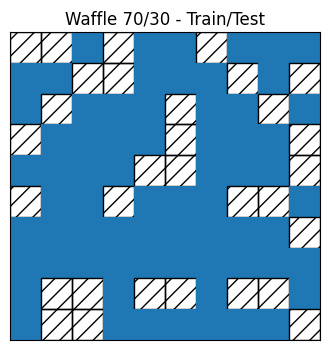

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Ya tienes algo así:
# np.random.seed(1)
# msk = np.random.rand(len(df)) < 0.7

# 1) Proporciones de train y test a partir de la máscara
train_prop = msk.mean()      # True = 1, False = 0
test_prop = 1 - train_prop

print("Proporción train:", train_prop)
print("Proporción test :", test_prop)

# 2) Preparar datos para el gráfico de waffle (100 celdas)
n_cells = 100
train_cells = int(round(train_prop * n_cells))
test_cells  = n_cells - train_cells

# 1 = train, 0 = test
data = np.array([1] * train_cells + [0] * test_cells)
np.random.shuffle(data)  # para mezclar la posición

n_rows = 10
n_cols = 10
waffle = data.reshape((n_rows, n_cols))

# 3) Graficar el waffle
plt.figure(figsize=(4, 4))
for i in range(n_rows):
    for j in range(n_cols):
        if waffle[i, j] == 1:
            # cuadrito para TRAIN
            plt.gca().add_patch(plt.Rectangle((j, n_rows-1-i), 1, 1))
        else:
            # cuadrito para TEST (rayado)
            plt.gca().add_patch(plt.Rectangle((j, n_rows-1-i), 1, 1, hatch='//', fill=False))

plt.xlim(0, n_cols)
plt.ylim(0, n_rows)
plt.xticks([])
plt.yticks([])
plt.title("Waffle 70/30 - Train/Test")
plt.show()


In [ ]:
test.head()

# Euclidean Distance

It is used to measure the distance between samples p and q in an n-dimensional feature space:

<img src="https://drive.google.com/uc?export=view&id=13p3YOEqHybBrN8P5wpsPwBC6-7v3N98f">

For example, picture it as a "straight, connecting" line in a 2D feature space:

<img src="https://drive.google.com/uc?export=view&id=1Qc0nBRJTWBrJeKZvvj8dVk7YZJrvMpn8">

In [ ]:
def euclideanDistance(instance1, instance2, length):
    distance = 0
    for x in range(length):
        distance += pow((instance1[x] - instance2[x]), 2)
    return math.sqrt(distance)

# Calculating the Nearest Neighbors

Let us consider that our data is scattered as shown below. Let the red circles denote Malignant and the green circles denote Benign:

<img src="https://drive.google.com/uc?export=view&id=1oEbIjxE0Ysdo5fEeNU5CGo4ruP544Ywz">

In this example we are calculating k=3 nearest neighbors so the curve of fit will look like:

<img src="https://drive.google.com/uc?export=view&id=1amCw22CqF0ideK9VWNIWQAASpZOWGPwi">

In [ ]:
def getNeighbors(trainingSet, testInstance, k):
    distances = []  #List to store all the distance values
    length = len(testInstance) - 1
    for x in range(len(trainingSet)):
        dist = euclideanDistance(testInstance, trainingSet[x], length)  #Calculating the Euclidean Distance
        distances.append((trainingSet[x],dist))  #Appending the distance values to the 'distance' list
    distances.sort(key=operator.itemgetter(1))  #Sorting based on the disance value
    neighbors = []  #List to store all the neighbors
    for x in range(k):
        neighbors.append(distances[x][0])  #Number of neighbors is dependent on the value of k
    return neighbors

In [ ]:
def getResponse(neighbors):
    classVotes = {}  #Dictionary to store labels with their counts
    for x in range(len(neighbors)):
        response = neighbors[x][-1]  #Label value of the neighbors
        if response in classVotes:
            classVotes[
                response] += 1  #if label value is already present increment it by 1
        else:
            classVotes[
                response] = 1  #If the label value is not yet present add it to the dictionary
    sortedVotes = sorted(
        classVotes.items(), key=operator.itemgetter(1), reverse=True
    )  #Sort the dictinary based on the count value in descending order
    return sortedVotes[0][
        0]  #Return the label with highest number of occurences

In [ ]:
print(distances)

# Calculating the accuracy

Accuracy is one metric for evaluating machine learning models. Informally, accuracy is the fraction of predictions our model got right. Formally, accuracy has the following definition:

<img src="https://drive.google.com/uc?export=view&id=1gk-T6kanOB6mM_bs54jgyMs0Bu93V4sh">

In [ ]:
def getAccuracy(testSet, predictions):
    correct = 0  #Variable to store the correct predictions
    for x in range(len(testSet)):
        if testSet[x][-1] is predictions[x]:  #Checking whether the predicted value is same as label value
            correct += 1  #Incremented when both values are same
    return (correct / float(len(testSet))) * 100.0  #Accuracy = No. of Correct pred / Total number of pred

# Implementation on a smaller dataset

In [ ]:
trainSet = [[5, 1, 1, 1, 2, 1, 3, 2, 1, 2],
            [10, 10, 10, 10, 5, 10, 10, 10, 7, 4]]
testInstance = [4, 8, 6, 4, 3, 4, 10, 6, 1, 2]
k = 1
neighbors = getNeighbors(trainSet, testInstance, k)
print(neighbors)

In [ ]:
neighbors = [[5, 1, 1, 1, 2, 1, 3, 2, 1, 2], [3, 1, 1, 1, 2, 1, 2, 3, 1, 2],
             [10, 10, 10, 10, 5, 10, 10, 10, 7, 4]]
response = getResponse(neighbors)
print(response)

In [ ]:
testSet = [[5, 1, 1, 1, 2, 1, 3, 2, 1, 2], [3, 1, 1, 1, 2, 1, 2, 3, 1, 2],
           [10, 10, 10, 10, 5, 10, 10, 10, 7, 4]]
predictions = [2, 2, 2]
accuracy = getAccuracy(testSet, predictions)
print(accuracy)

# Implementation on the imported dataset

In [ ]:
predictions = []  #List to store the predicted values
k = 3  # 3-Nearest Neighbors
trainingSet = train.values.tolist()  #List containing training data
testSet = test.values.tolist()  #List containing test data
for x in range(len(testSet)):
    neighbors = getNeighbors(trainingSet, testSet[x], k)
    result = getResponse(neighbors)
    predictions.append(result)  # Storing the predicted values
    print('> predicted=' + repr(result) + ', actual=' + repr(testSet[x][-1]))

# Confusion Matrix

Confusion Matrix is a performance measurement for machine learning classification problem where output can be two or more classes. It is a table with 4 different combinations of predicted and actual values.

<img src="https://drive.google.com/uc?export=view&id=1hYthqmYW82QHRFnIpiGQDLt4r44aurv7">

In [ ]:
print("Confusion Matrix")
y_test = []
for i in testSet:
    y_test.append(i[30])
from sklearn.metrics import confusion_matrix, accuracy_score
res = confusion_matrix(y_test, predictions)
print(res)

# Accuracy

In [ ]:
accuracy = accuracy_score(y_test, predictions) * 100
print('Accuracy: ' + repr(accuracy) + '%')